<a href="https://colab.research.google.com/github/varna10/CODSOFT/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Download NLTK stopwords
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df = pd.read_csv("spam.csv", encoding="latin-1")
# Keep only the necessary columns
df = df.iloc[:, [0, 1]]
df.columns = ["label", "message"]
# Convert labels to 0 (ham) and 1 (spam)
df["label"] = df["label"].map({"ham": 0, "spam": 1})
# Function for Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)
# Apply Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


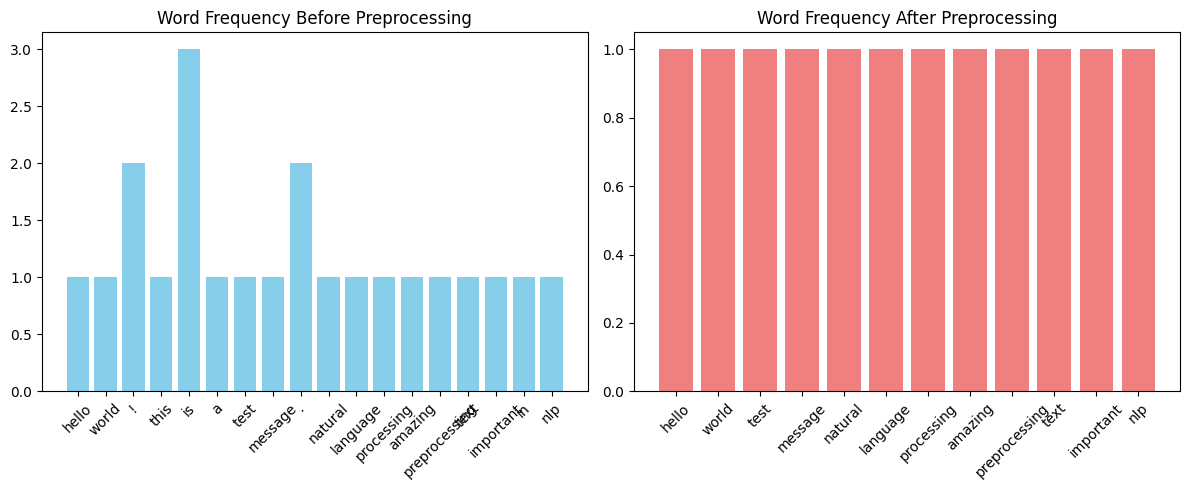

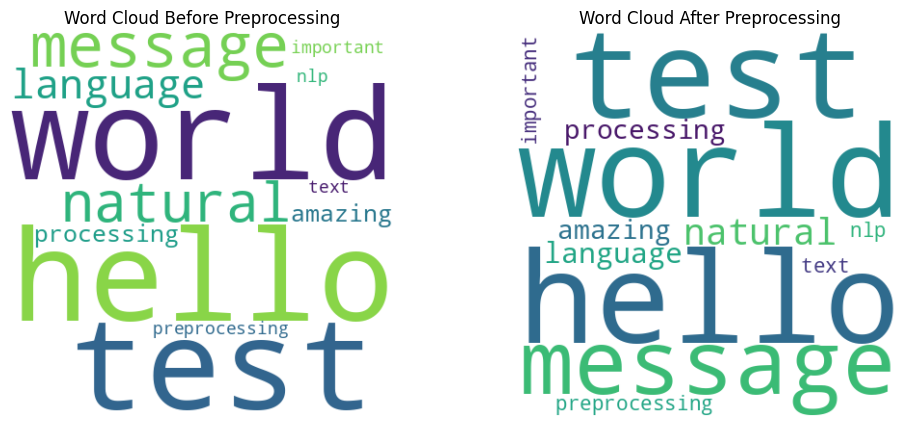

In [6]:
# Apply Preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)
# Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_message"]).toarray()
y = df["label"]
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download required datasets
nltk.download('punkt')
nltk.download('stopwords')

# Sample Data (Replace with your DataFrame)
data = {'message': ["Hello world! This is a test message.",
                    "Natural Language Processing is amazing!",
                    "Preprocessing text is important in NLP."]}
df = pd.DataFrame(data)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return words

# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

# Flatten list of words
all_words_before = [word.lower() for text in df["message"] for word in word_tokenize(text)]
all_words_after = [word for words in df["cleaned_message"] for word in words]

# Frequency distribution
word_freq_before = Counter(all_words_before)
word_freq_after = Counter(all_words_after)

# Visualization: Bar Chart Before & After Preprocessing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Preprocessing
axes[0].bar(word_freq_before.keys(), word_freq_before.values(), color='skyblue')
axes[0].set_title("Word Frequency Before Preprocessing")
axes[0].tick_params(axis='x', rotation=45)

# After Preprocessing
axes[1].bar(word_freq_after.keys(), word_freq_after.values(), color='lightcoral')
axes[1].set_title("Word Frequency After Preprocessing")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualization: Word Cloud
wordcloud_before = WordCloud(width=400, height=400, background_color='white').generate(" ".join(all_words_before))
wordcloud_after = WordCloud(width=400, height=400, background_color='white').generate(" ".join(all_words_after))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(wordcloud_before, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Word Cloud Before Preprocessing")

axes[1].imshow(wordcloud_after, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Word Cloud After Preprocessing")

plt.show()


In [7]:
# Train and Evaluate Models
models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"🔹 Model: {name}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

🔹 Model: Naïve Bayes
✅ Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------------------------
🔹 Model: Logistic Regression
✅ Accuracy: 0.9488789237668162
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115

--------------------------------------------------


In [8]:
models = {
    "SVM": SVC(kernel="linear")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"🔹 Model: {name}")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

🔹 Model: SVM
✅ Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

